Se importan las librerías necesarias

In [224]:
%reset -f
import pandas as pd
import numpy as np
from scipy.fft import fft, fftfreq
from scipy import signal
import matplotlib.pyplot as plt
import plotly.express as px
plt.style.use(['science', 'notebook', 'grid'])

Se cargan los datos de los primeros 4 meses del año

In [225]:
data_abril = pd.read_csv('fnew-2022-4.csv')
data_marzo = pd.read_csv('fNew 2022 3.csv')
data_febrero = pd.read_csv('fNew 2022 2.csv')
data_enero = pd.read_csv('fNew 2022 1.csv')

Se grafican los datos

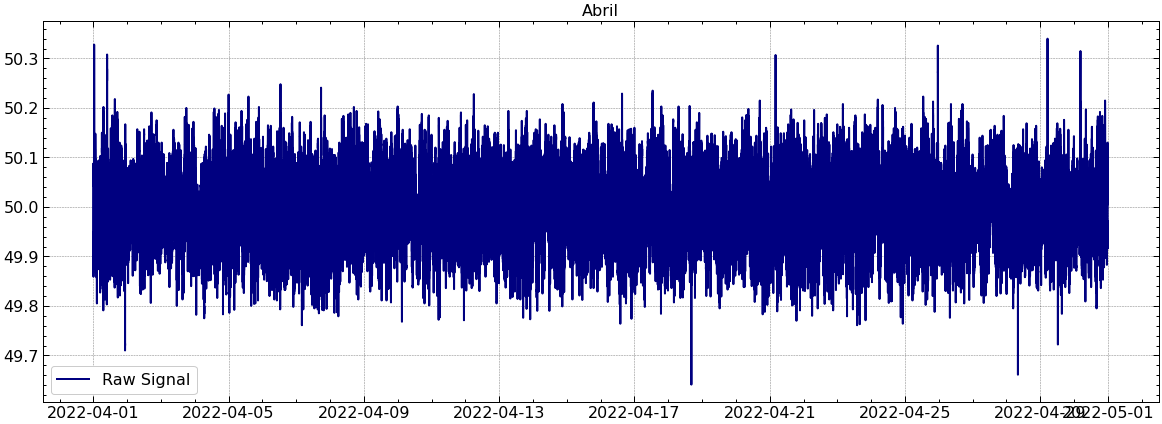

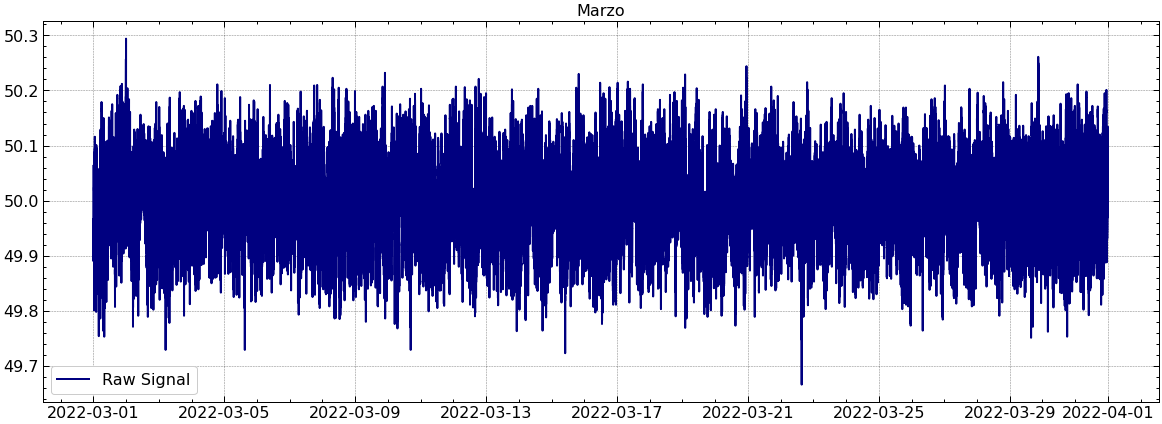

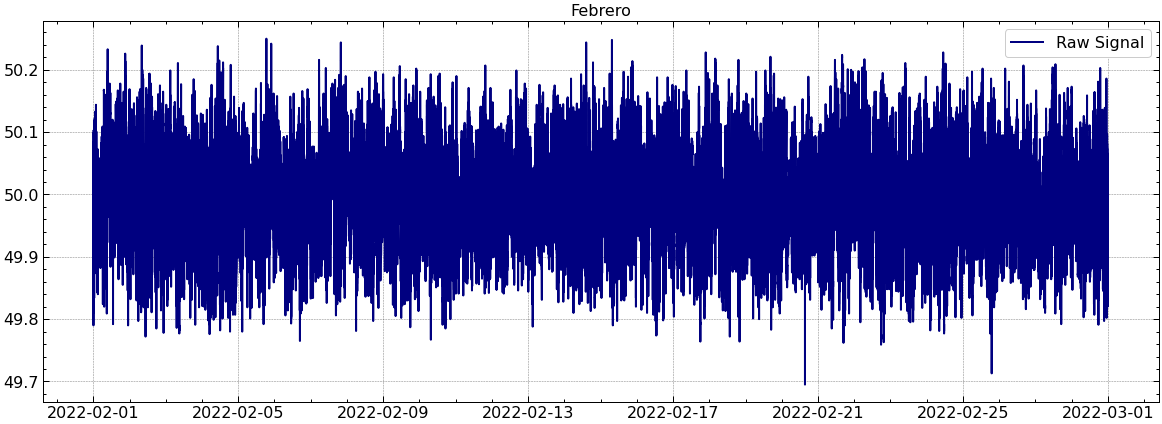

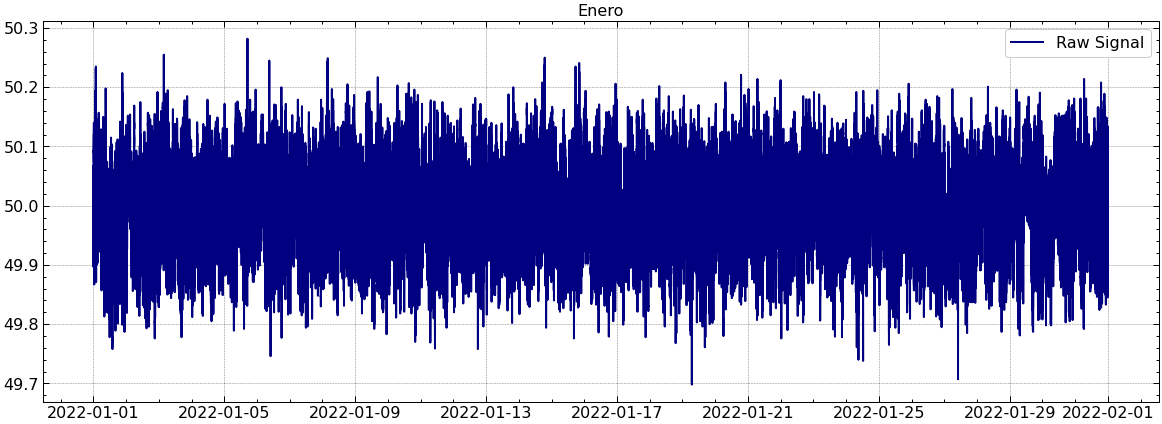

In [226]:
x = data_abril.index
y = np.array(data_abril.f)
date_arr = pd.to_datetime(data_abril.dtm)
plt.figure(figsize=(20, 7))
plt.plot(date_arr, y, color='navy', label='Raw Signal')
plt.legend()
plt.title('Abril')
plt.show()

x1 = data_marzo.index
y1 = np.array(data_marzo.f)
date_arr1 = pd.to_datetime(data_marzo.dtm)
plt.figure(figsize=(20, 7))
plt.plot(date_arr1, y1, color='navy', label='Raw Signal')
plt.legend()
plt.title('Marzo')
plt.show()

x2 = data_febrero.index
y2 = np.array(data_febrero.f)
date_arr2 = pd.to_datetime(data_febrero.dtm)
plt.figure(figsize=(20, 7))
plt.plot(date_arr2, y2, color='navy', label='Raw Signal')
plt.legend()
plt.title('Febrero')
plt.show()

x3 = data_enero.index
y3 = np.array(data_enero.f)
date_arr3 = pd.to_datetime(data_enero.dtm)
plt.figure(figsize=(20, 7))
plt.plot(date_arr3, y3, color='navy', label='Raw Signal')
plt.legend()
plt.title('Enero')
plt.show()

Se quita la tendencia de los datos, dicho de otra forma el promedio ya no es de $50Hz$ ahora es de $0Hz$

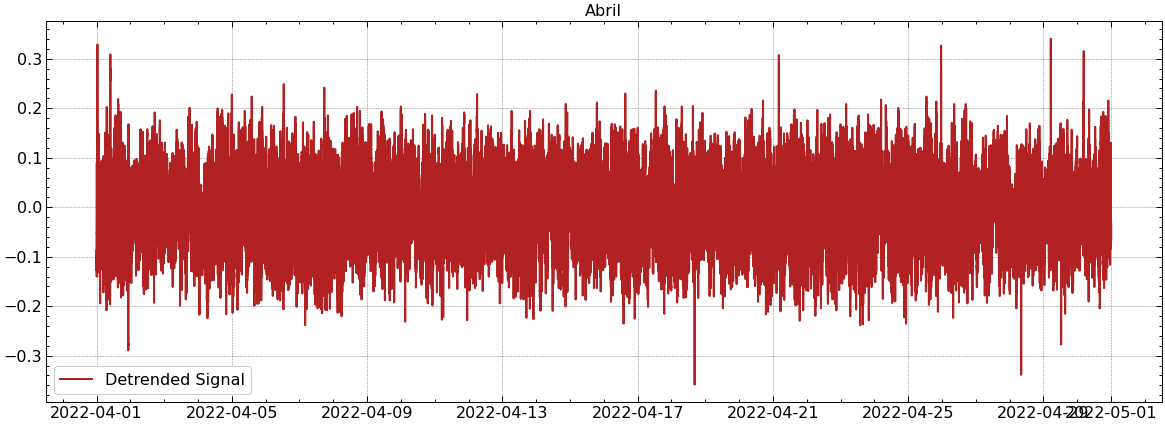

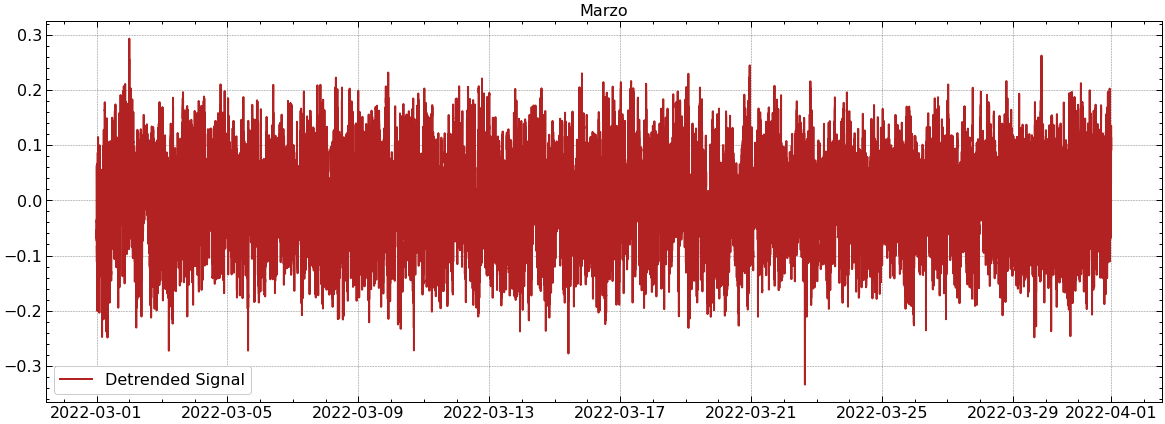

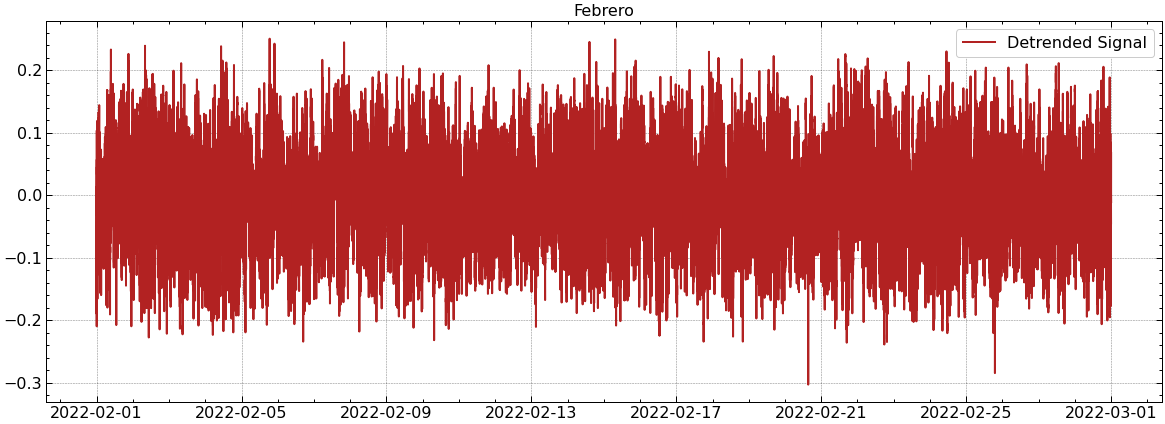

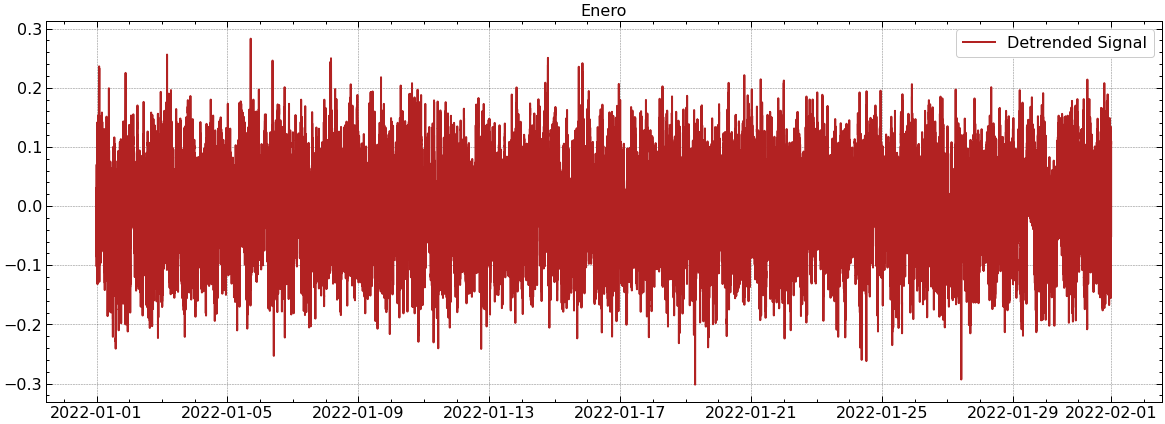

In [227]:
y_detrend = signal.detrend(y)
plt.figure(figsize=(20, 7))
plt.plot(date_arr, y_detrend, color='firebrick', label='Detrended Signal')
plt.legend()
plt.title('Abril')
plt.show()

y_detrend1 = signal.detrend(y1)
plt.figure(figsize=(20, 7))
plt.plot(date_arr1, y_detrend1, color='firebrick', label='Detrended Signal')
plt.legend()
plt.title('Marzo')
plt.show()

y_detrend2 = signal.detrend(y2)
plt.figure(figsize=(20, 7))
plt.plot(date_arr2, y_detrend2, color='firebrick', label='Detrended Signal')
plt.legend()
plt.title('Febrero')
plt.show()

y_detrend3 = signal.detrend(y3)
plt.figure(figsize=(20, 7))
plt.plot(date_arr3, y_detrend3, color='firebrick', label='Detrended Signal')
plt.legend()
plt.title('Enero')
plt.show()

Se realiza la transformada de Fourier y se grafica parte de los datos, en el eje $y$ se encuentra el valor absoluto de los valores arrojados por la transformada

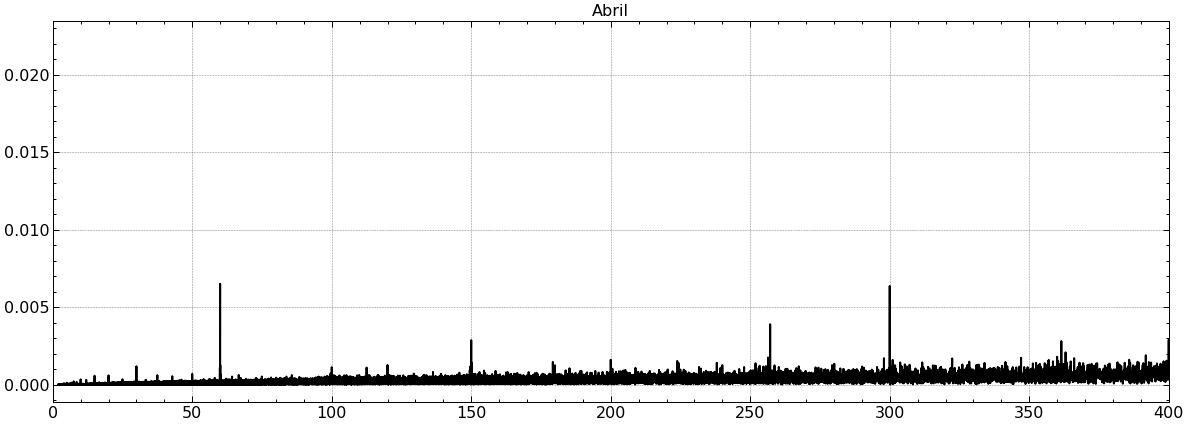

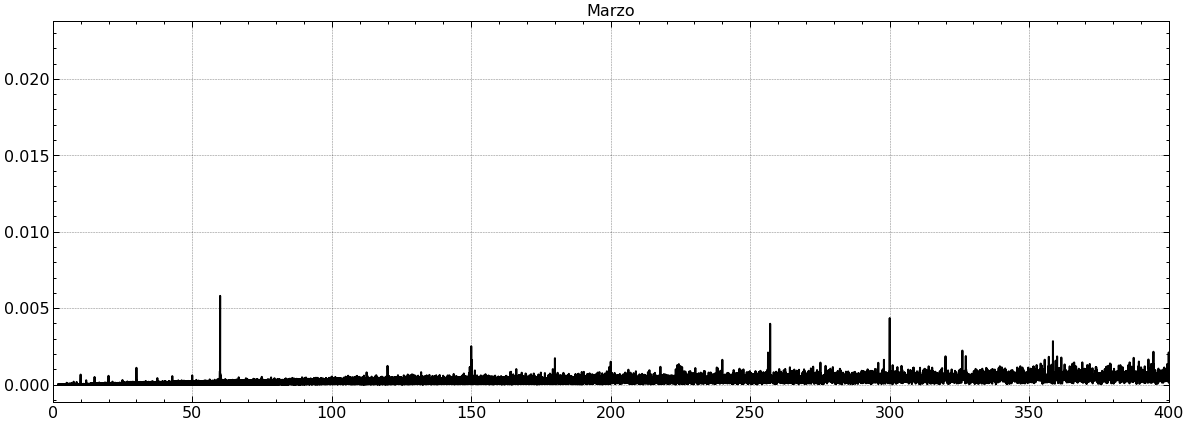

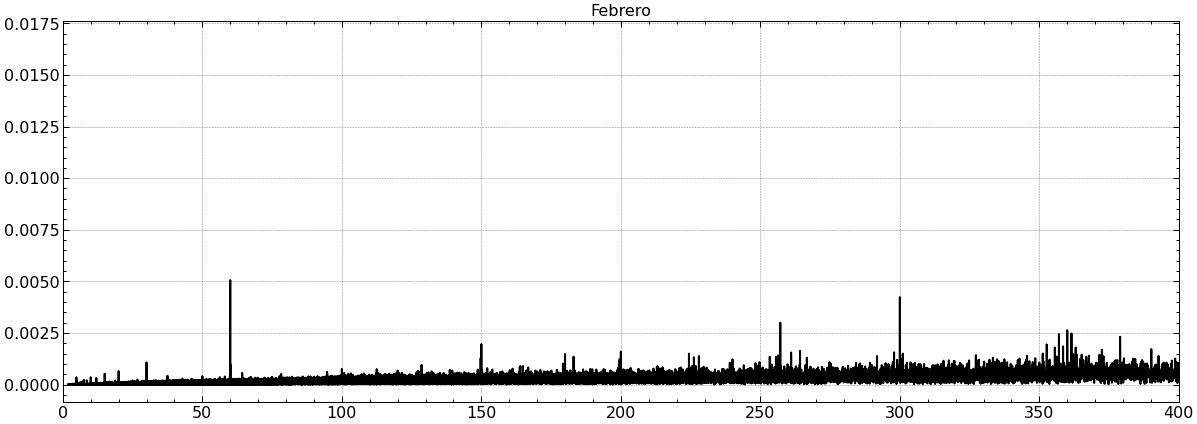

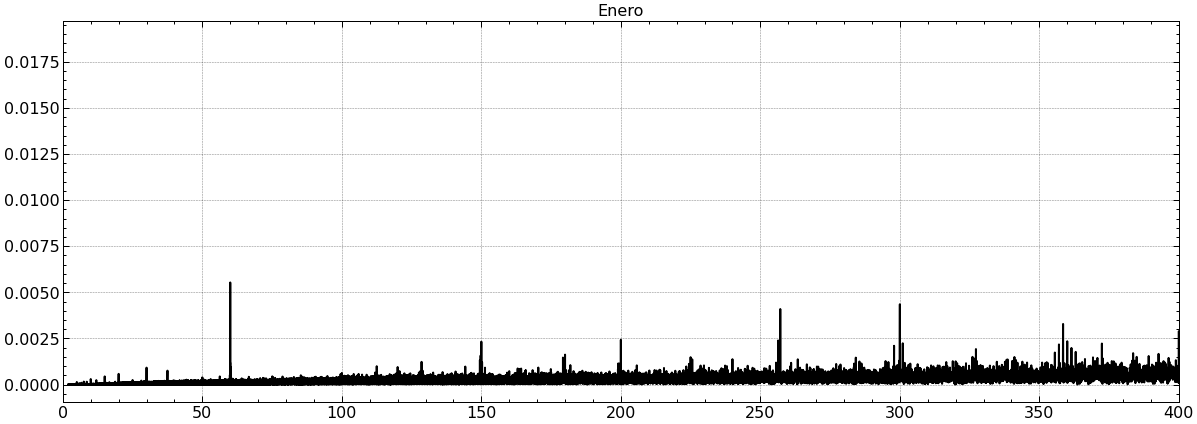

In [228]:
FFT = fft(y_detrend)
new_N = int(len(FFT)/2)
f_nat = 1
new_X = np.linspace(10**-12, f_nat/2, new_N, endpoint=True)
new_Xph = 1.0/(new_X)
FFT_abs = np.abs(FFT)
plt.figure(figsize=(20, 7))
plt.plot(new_Xph,2*FFT_abs[0:int(len(FFT)/2.)]/len(new_Xph),color='black')
plt.xlim(0,400)
plt.title('Abril')
plt.show()

FFT1 = fft(y_detrend1)
new_N1 = int(len(FFT1)/2)
f_nat1 = 1
new_X1 = np.linspace(10**-12, f_nat1/2, new_N1, endpoint=True)
new_Xph1 = 1.0/(new_X1)
FFT_abs1 = np.abs(FFT1)
plt.figure(figsize=(20, 7))
plt.plot(new_Xph1,2*FFT_abs1[0:int(len(FFT1)/2.)]/len(new_Xph1),color='black')
plt.xlim(0,400)
plt.title('Marzo')
plt.show()

FFT2 = fft(y_detrend2)
new_N2 = int(len(FFT2)/2)
f_nat2 = 1
new_X2 = np.linspace(10**-12, f_nat2/2, new_N2, endpoint=True)
new_Xph2 = 1.0/(new_X2)
FFT_abs2 = np.abs(FFT2)
plt.figure(figsize=(20, 7))
plt.plot(new_Xph2,2*FFT_abs2[0:int(len(FFT2)/2.)]/len(new_Xph2),color='black')
plt.xlim(0,400)
plt.title('Febrero')
plt.show()

FFT3 = fft(y_detrend3)
new_N3 = int(len(FFT3)/2)
f_nat3 = 1
new_X3 = np.linspace(10**-12, f_nat3/2, new_N3, endpoint=True)
new_Xph3 = 1.0/(new_X3)
FFT_abs3 = np.abs(FFT3)
plt.figure(figsize=(20, 7))
plt.plot(new_Xph3,2*FFT_abs3[0:int(len(FFT3)/2.)]/len(new_Xph3),color='black')
plt.xlim(0,400)
plt.title('Enero')
plt.show()

A simple vista parece ser que el aumento de actividad se da más o menos por las mismas zonas

Con el uso de pandas se buscan las 20 amplitudes más grandes para Abril y se selecciona un valor para filtrar las señales de todos los demás meses incluyendo el mencionado

In [229]:
fft_abs = 2*FFT_abs[0:int(len(FFT)/2.)]/len(new_Xph)
fft_abs = pd.DataFrame(fft_abs, columns = ['Amplitude'])
fft_sorted = fft_abs.sort_values(by='Amplitude',ascending=False).head(20)

fft_abs1 = 2*FFT_abs1[0:int(len(FFT1)/2.)]/len(new_Xph1)
fft_abs1 = pd.DataFrame(fft_abs1, columns = ['Amplitude'])
fft_sorted1 = fft_abs1.sort_values(by='Amplitude',ascending=False).head(20)

fft_abs2 = 2*FFT_abs2[0:int(len(FFT2)/2.)]/len(new_Xph2)
fft_abs2 = pd.DataFrame(fft_abs2, columns = ['Amplitude'])
fft_sorted2 = fft_abs2.sort_values(by='Amplitude',ascending=False).head(20)

fft_abs3 = 2*FFT_abs3[0:int(len(FFT3)/2.)]/len(new_Xph3)
fft_abs3 = pd.DataFrame(fft_abs3, columns = ['Amplitude'])
fft_sorted3 = fft_abs3.sort_values(by='Amplitude',ascending=False).head(20)

fft_sorted

,Amplitude
2880,0.022334
180,0.013994
1440,0.011576
85,0.010472
690,0.009860
60,0.009774
4320,0.009740
16,0.009654
1200,0.009586
30,0.009339


Se definen funciones que van a filtrar los datos de acuerdo a la amplitud elegida. <br>
Dicho de otra forma, se limpiarán los datos que estén por debajo de cierto umbral

In [230]:
def fft_filter(th):
    fft_tof=FFT.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof[fft_tof_abs<=th]=0
    return fft_tof

def fft_filter_amp(th):
    fft_tof=FFT.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof_abs[fft_tof_abs<=th]=0
    return fft_tof_abs[0:int(len(fft_tof_abs)/2.)]

def fft_filter1(th):
    fft_tof=FFT1.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph1)
    fft_tof[fft_tof_abs<=th]=0
    return fft_tof

def fft_filter_amp1(th):
    fft_tof=FFT1.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph1)
    fft_tof_abs[fft_tof_abs<=th]=0
    return fft_tof_abs[0:int(len(fft_tof_abs)/2.)]

def fft_filter2(th):
    fft_tof=FFT2.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph2)
    fft_tof[fft_tof_abs<=th]=0
    return fft_tof

def fft_filter_amp2(th):
    fft_tof=FFT2.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph2)
    fft_tof_abs[fft_tof_abs<=th]=0
    return fft_tof_abs[0:int(len(fft_tof_abs)/2.)]

def fft_filter3(th):
    fft_tof=FFT3.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph3)
    fft_tof[fft_tof_abs<=th]=0
    return fft_tof

def fft_filter_amp3(th):
    fft_tof=FFT3.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph3)
    fft_tof_abs[fft_tof_abs<=th]=0
    return fft_tof_abs[0:int(len(fft_tof_abs)/2.)]

Text(0.5, 1.0, 'Enero')

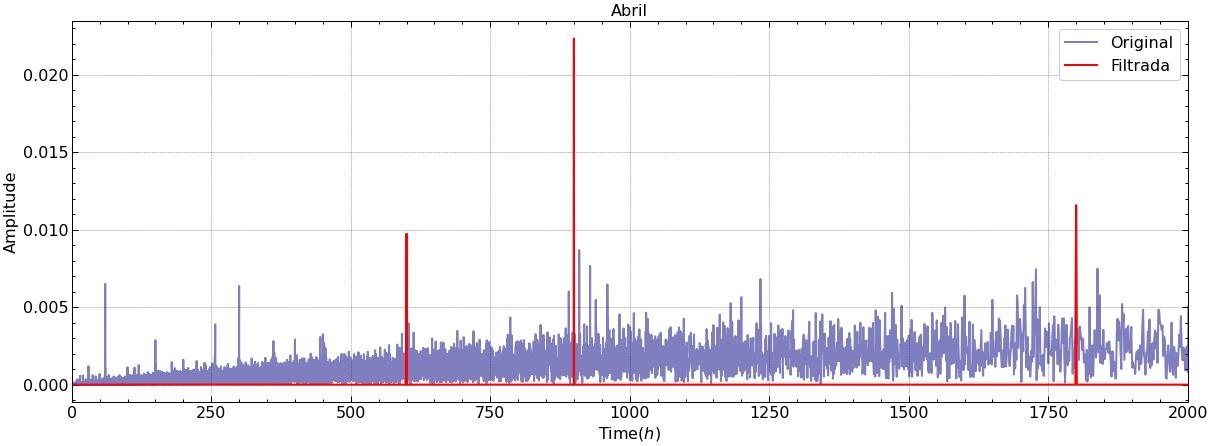

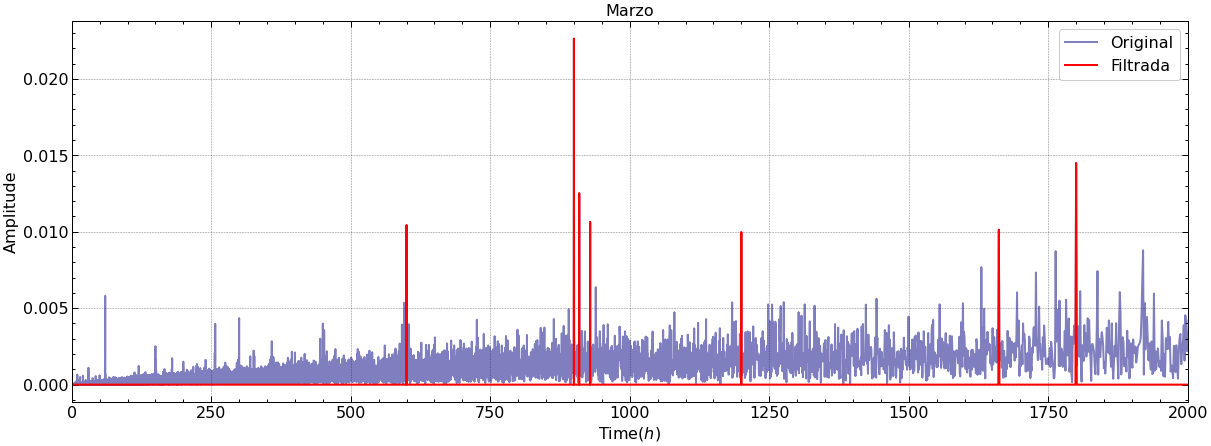

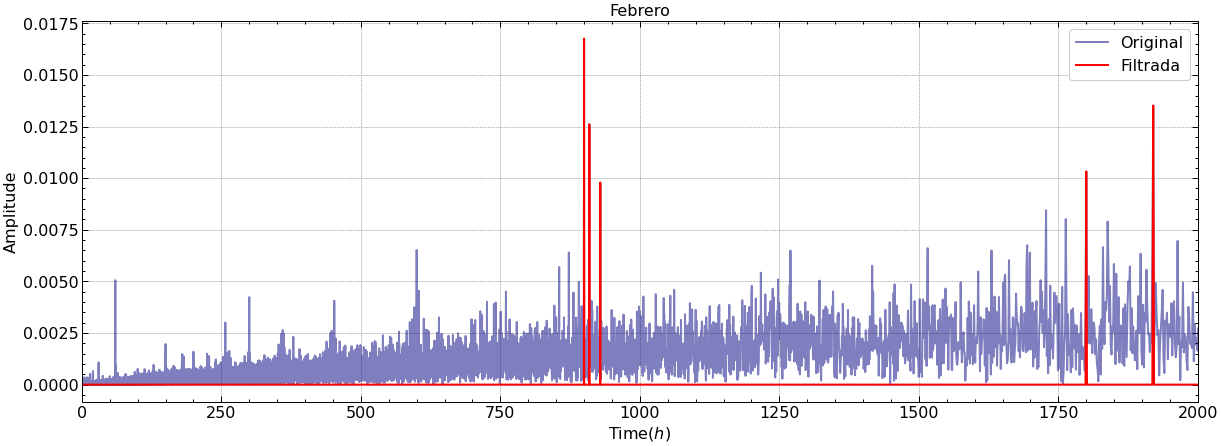

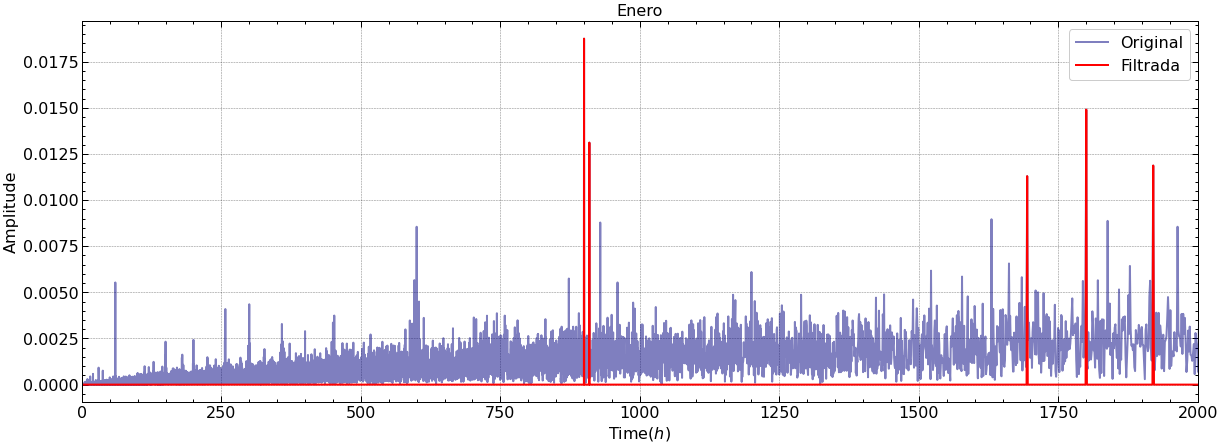

In [231]:
k=0.009
plt.figure(figsize=(20, 7))
plt.title('k=' + str(k))
plt.xlim(0,2000)
plt.plot(new_Xph,2*FFT_abs[0:int(len(FFT)/2.)]/len(new_Xph),color='navy',alpha=0.5,label='Original')
plt.grid(True)
plt.plot(new_Xph,fft_filter_amp(k),'red',label='Filtrada')
plt.xlabel('Time($h$)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Abril')

k=0.009
plt.figure(figsize=(20, 7))
plt.title('k=' + str(k))
plt.xlim(0,2000)
plt.plot(new_Xph1,2*FFT_abs1[0:int(len(FFT1)/2.)]/len(new_Xph1),color='navy',alpha=0.5,label='Original')
plt.grid(True)
plt.plot(new_Xph1,fft_filter_amp1(k),'red',label='Filtrada')
plt.xlabel('Time($h$)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Marzo')

k=0.009
plt.figure(figsize=(20, 7))
plt.title('k=' + str(k))
plt.xlim(0,2000)
plt.plot(new_Xph2,2*FFT_abs2[0:int(len(FFT2)/2.)]/len(new_Xph2),color='navy',alpha=0.5,label='Original')
plt.grid(True)
plt.plot(new_Xph2,fft_filter_amp2(k),'red',label='Filtrada')
plt.xlabel('Time($h$)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Febrero')

k=0.009
plt.figure(figsize=(20, 7))
plt.title('k=' + str(k))
plt.xlim(0,2000)
plt.plot(new_Xph3,2*FFT_abs3[0:int(len(FFT3)/2.)]/len(new_Xph3),color='navy',alpha=0.5,label='Original')
plt.grid(True)
plt.plot(new_Xph3,fft_filter_amp3(k),'red',label='Filtrada')
plt.xlabel('Time($h$)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Enero')

Se aplica un filtro y se calcula la transformada inversa

In [232]:
def fft_filter(perc):
    th=perc*(2*FFT_abs[0:int(len(FFT)/2.)]/len(new_Xph)).max()
    fft_tof=FFT.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof[fft_tof_abs<=th]=0
    return fft_tof

def fft_filter1(perc):
    th=perc*(2*FFT_abs1[0:int(len(FFT1)/2.)]/len(new_Xph1)).max()
    fft_tof=FFT1.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph1)
    fft_tof[fft_tof_abs<=th]=0
    return fft_tof

def fft_filter2(perc):
    th=perc*(2*FFT_abs2[0:int(len(FFT2)/2.)]/len(new_Xph2)).max()
    fft_tof=FFT2.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph2)
    fft_tof[fft_tof_abs<=th]=0
    return fft_tof

def fft_filter3(perc):
    th=perc*(2*FFT_abs3[0:int(len(FFT3)/2.)]/len(new_Xph3)).max()
    fft_tof=FFT3.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph3)
    fft_tof[fft_tof_abs<=th]=0
    return fft_tof

Se grafica la señal filtrada gracias a la transformada inversa y el filtro

c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Load')

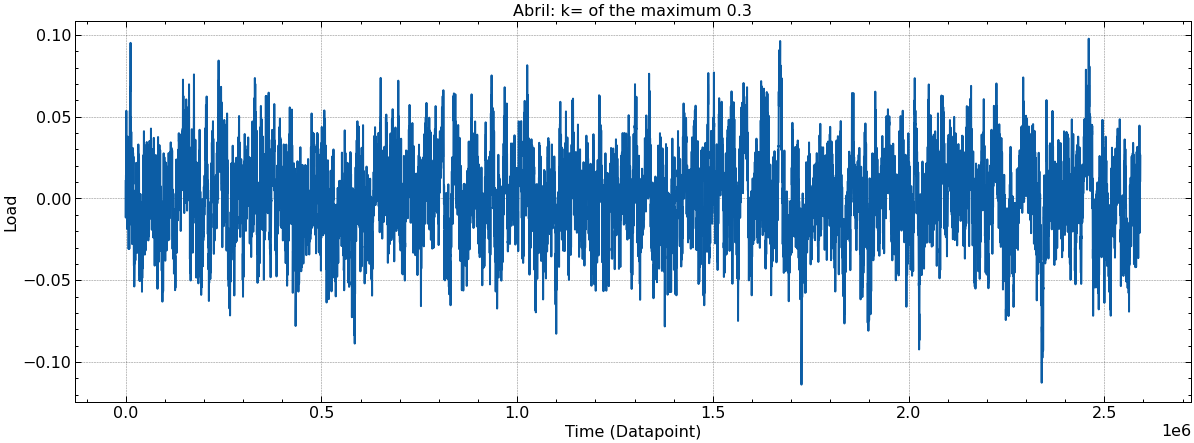

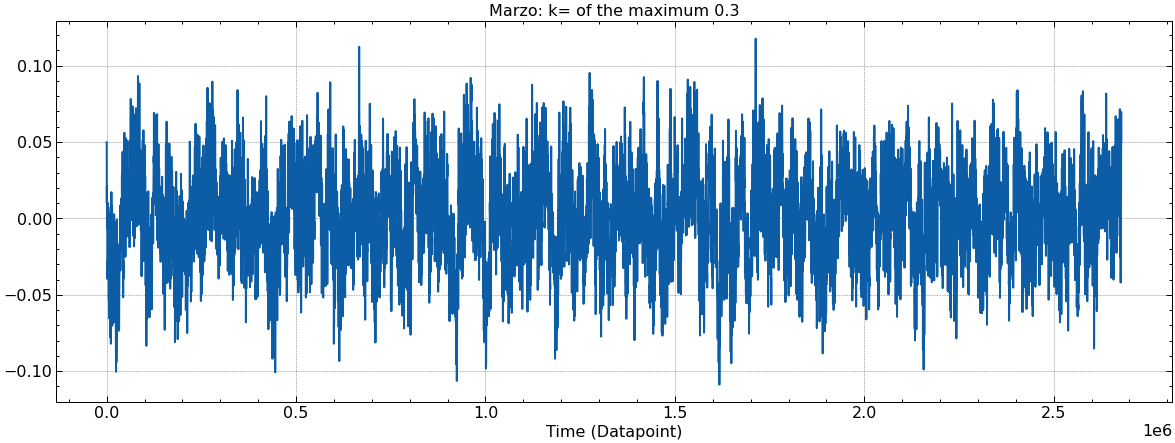

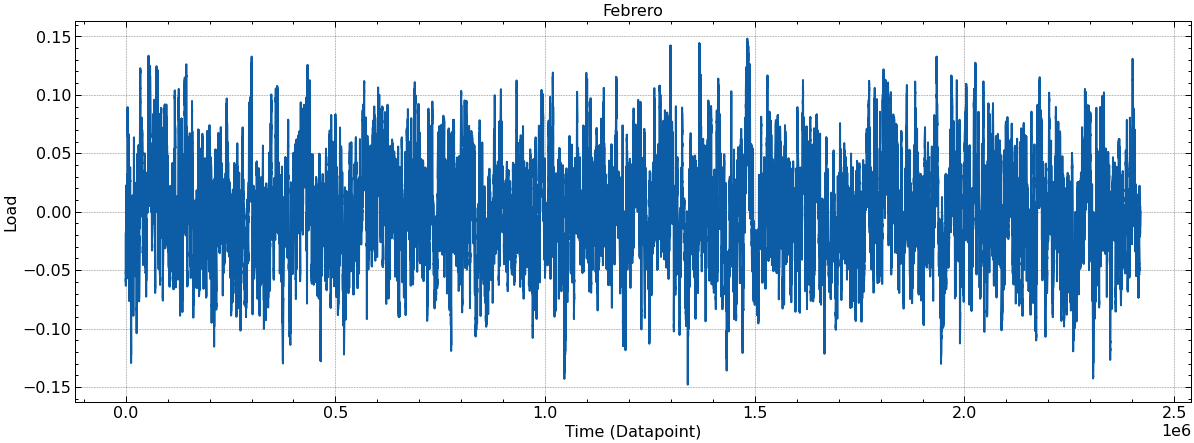

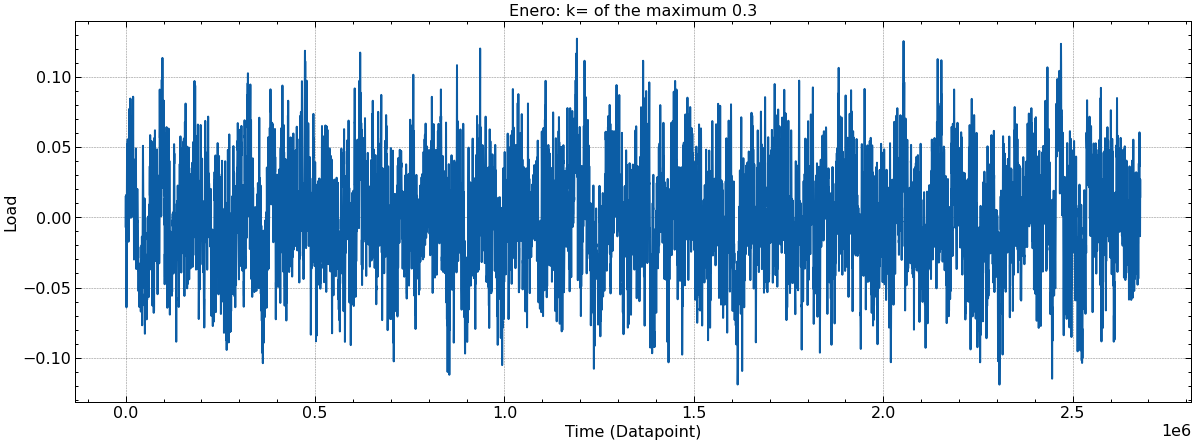

In [233]:
k = 0.3
plt.figure(figsize=(20, 7))
plt.plot(x,np.fft.ifft(fft_filter(k)))
plt.title(f'Abril: k= of the maximum {k}')
plt.xlabel('Time (Datapoint)')
plt.ylabel('Load')

k = 0.3
plt.figure(figsize=(20, 7))
plt.plot(x1,np.fft.ifft(fft_filter1(k)))
plt.title(f'Marzo: k= of the maximum {k}')
plt.xlabel('Time (Datapoint)')

k = 0.3
plt.figure(figsize=(20, 7))
plt.plot(x2,np.fft.ifft(fft_filter2(k)))
plt.title(f'Febrero: k= of the maximum {k}')
plt.xlabel('Time (Datapoint)')
plt.ylabel('Load')
plt.title('Febrero')

k = 0.3
plt.figure(figsize=(20, 7))
plt.plot(x3,np.fft.ifft(fft_filter3(k)))
plt.title(f'Enero: k= of the maximum {k}')
plt.xlabel('Time (Datapoint)')
plt.ylabel('Load')


A pesar de haber filtrado las señales no obtedriamos mucha información para trabaajar, así que graficaremos las transformadas en una sola gráfica

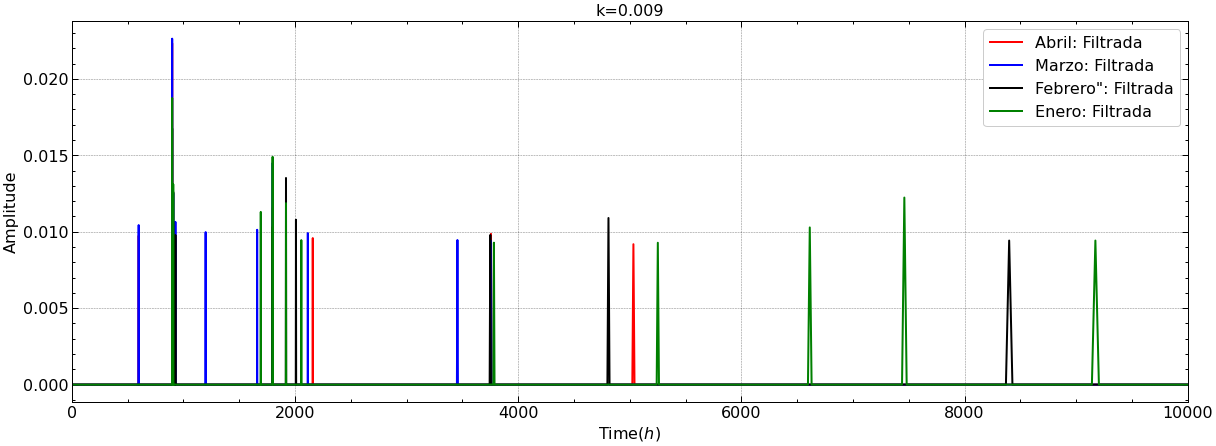

In [236]:
k=0.009
plt.figure(figsize=(20, 7))
plt.title('k=' + str(k))
plt.xlim(0,10000)

plt.plot(new_Xph,fft_filter_amp(k),'red',label='Abril: Filtrada')
plt.plot(new_Xph1,fft_filter_amp1(k),'blue',label='Marzo: Filtrada')
plt.plot(new_Xph2,fft_filter_amp2(k),'black',label='Febrero": Filtrada')
plt.plot(new_Xph3,fft_filter_amp3(k),'green',label='Enero: Filtrada')

plt.xlabel('Time($h$)')
plt.ylabel('Amplitude')
plt.legend()



En el espacio de la transformada y al haber filtrado por amplitudes podemos observar que al menos en los primeros 4 meses del año existe una tendencia parecida a reportar un mayor aumento en la variación de la señal (tráfico de datos) alrededor de fechas parecidas. <br>
Esto se sabe porque los picos o amplitudes que se aprecian no están muy esparcidas en lugares bastante alejados las de unos meses con otras, claro está que hay zonas que corresponden a un aumento de la señal que otros meses no tienen al menos no en un tiempo cercano.